# Conduct reversal test on directional data in MagIC format using PmagPy

In this notebook, we conduct a reversal test on site level paleomagnetic directional data from the following study.

> Behar, N., Shaar, R., Tauxe, L., Asefaw,
H., Ebert, Y., Heimann, A., et al. (2019).
Paleomagnetism and paleosecular
variations from the Plio‐Pleistocene
Golan Heights volcanic plateau, Israel.
Geochemistry, Geophysics, Geosystems,
20 https://doi.org/10.1029/2019GC008479

### Change the MagIC contribution

You can change what study this notebook is applied to by changing the `magic_id` in the **Download data** code below.

### Apply to your own `sites.txt` data

You can also substitute in your own MagIC format `sites.txt` file. To do this, skip the **Download data** section and got to the **Import the sites table** section after running the **Import packages** code.

## Import packages

In [1]:
import pmagpy.ipmag as ipmag
import pandas as pd
%matplotlib inline
%config InlineBackend.figure_format='retina'

## Download data

Following the steps in the 
`Inspecting_MagIC_directional_data.ipynb`
notebook, we can download and unpack the data.

In [2]:
magic_id='16676'
result, magic_file_name = ipmag.download_magic_from_id(magic_id)
ipmag.download_magic(magic_file_name,print_progress=False)

100% [......................................................] 1133759 / 11337591  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/contribution.txt
1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/locations.txt
91  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/sites.txt
611  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/samples.txt
676  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/specimens.txt
6297  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/measurements.txt
1  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_notebooks/criteria.txt
91  records written to file  /Users/unimos/0000_Github/PmagPy-docs/example_notebooks/template_n

True

### Import the sites table

We can now use pandas to import the sites table to a pandas dataframe using the function `pd.read_csv()`.

In [3]:
sites = pd.read_csv('sites.txt',sep='\t',header=1)
sites.head()

,age,age_high,age_low,age_unit,citations,criteria,dir_alpha95,dir_comp_name,dir_dec,dir_inc,...,result_quality,result_type,samples,site,software_packages,specimens,vgp_dm,vgp_dp,vgp_lat,vgp_lon
0,0.6798,0.6798,0.6798,Ma,This study,ACCEPT,4.7,Fit 1,350.0,37.2,...,g,i,GH01A:GH01B:GH01C:GH01D:GH01H:GH01M,GH01,pmagpy-3.16.0: demag_gui.v.3.0,GH01A1:GH01B1:GH01B2:GH01C1:GH01D1:GH01H1:GH01M1,5.5,3.2,74.8,254.1
1,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.3,Fit 1,349.7,37.2,...,g,i,GH02A:GH02C:GH02D:GH02E:GH02F:GH02G,GH02,pmagpy-3.16.0: demag_gui.v.3.0,GH02A1:GH02C1:GH02D1:GH02E1:GH02E2:GH02F1:GH02...,2.7,1.6,74.7,255.0
2,1.1115,1.1115,1.1115,Ma,This study,ACCEPT,2.3,Fit 1,157.0,-56.9,...,g,i,GH03A:GH03B:GH03C:GH03D:GH03E:GH03G:GH03H,GH03,pmagpy-3.16.0: demag_gui.v.3.0,GH03A1:GH03B1:GH03C1:GH03C2:GH03D1:GH03E1:GH03...,3.3,2.4,-70.8,145.5
3,1.3500,2.6000,0.1000,Ma,This study,ACCEPT,2.1,Fit 1,175.1,-58.0,...,g,i,GH04A:GH04B:GH04C:GH04D:GH04E:GH04F:GH04G:GH04H,GH04,pmagpy-3.16.0: demag_gui.v.3.0,GH04A1:GH04B1:GH04C1:GH04D1:GH04E1:GH04E2:GH04...,3.1,2.3,-83.1,181.8
4,1.1196,1.1196,1.1196,Ma,This study,ACCEPT,2.8,Fit 1,181.0,-56.8,...,g,i,GH05A:GH05B:GH05D:GH05G:GH05H:GH05I:GH05K:GH05L,GH05,pmagpy-3.16.0: demag_gui.v.3.0,GH05A1:GH05B1:GH05D1:GH05G1:GH05H1:GH05H2:GH05...,4.1,2.9,-85.6,226.0


We can extract specific columns from the dataframe by using the nomenclature `dataframe_name['column_name']`. In this case, we want to conduct a reversal test on the data in the `sites` dataframe and are interested in the directional data which are the declination column `dir_dec` and the inclination column `dir_inc`. So using the code `sites['dir_dec']` will give us all the declinations which we can assign to a variable `sites_dec`.

In [4]:
sites_dec = sites['dir_dec']
sites_inc = sites['dir_inc']

## Reversal tests

Now that we have extracted the declination and inclination values, let's conduct reversal tests on these data using the functions `ipmag.reversal_test_bootstrap` and `ipmag.reversal_test_MM1990`.

### Learn about the function

To learn more about this function we can type `ipmag.reversal_test_bootstrap?` in a code cell.

In [5]:
ipmag.reversal_test_bootstrap?

Signature:
ipmag.reversal_test_bootstrap(
    dec=None,
    inc=None,
    di_block=None,
    plot_stereo=False,
    color1='blue',
    color2='red',
    save=False,
    save_folder='.',
    fmt='svg',
)
Docstring:
Conduct a reversal test using bootstrap statistics (Tauxe, 2010) to
determine whether two populations of directions could be from an antipodal
common mean.

Parameters:
    dec: list of declinations
    inc: list of inclinations
    di_block: a nested list of [dec,inc]
        A di_block can be provided in which case it will be used instead of
        dec, inc lists.
    plot_stereo : before plotting the CDFs, plot stereonet with the
        bidirectionally separated data (default is False)
    save : boolean argument to save plots (default is False)
    save_folder : directory where plots will be saved (default is current directory, '.')
    fmt : format of saved figures (default is 'svg')

Returns:
    A boolean where 0 is fail and 1 is pass is returned. 
    Plots of the c

### Conduct the bootstrap reversal test

Let's go ahead and do the reversal test.

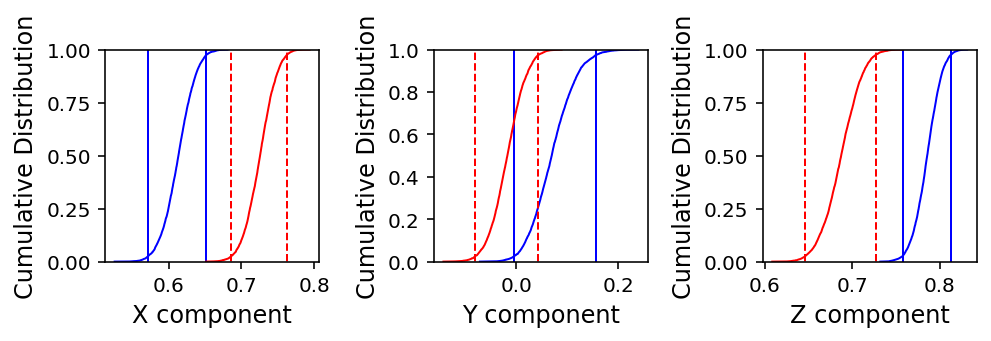

Fail, distinct in x and z


0

In [6]:
ipmag.reversal_test_bootstrap(dec=sites_dec,
                              inc=sites_inc)

## Conduct the Watson common mean reversal test

We can do the Watson common mean test (together with McFadden and McElhinny (1990) classification) as well:

In [7]:
ipmag.reversal_test_MM1990(dec=sites_dec,
                           inc=sites_inc)

Results of Watson V test: 

Watson's V:           13.3
Critical value of V:  6.0
"Fail": Since V is greater than Vcrit, the two means can
be distinguished at the 95% confidence level.

M&M1990 classification:

Angle between data set means: 9.9
Critical angle for M&M1990:   6.7



(0, 9.928574544258854, 6.662235847838227, '')